<a href="https://colab.research.google.com/github/PruthviPatelML/Second-hand-Car-Price-Data-Analysis/blob/main/Senece_BAN110_Project_ExploratoryAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the dataset
# We are using pandas library to read the csv format into dataframe format

import pandas as pd
import numpy as np

df=pd.read_csv('/content/drive/MyDrive/BAN110-FinalDB.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3001 entries, 0 to 3000
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    3001 non-null   int64  
 1   id            3001 non-null   int64  
 2   url           3001 non-null   object 
 3   region        3001 non-null   object 
 4   region_url    3001 non-null   object 
 5   price         3001 non-null   int64  
 6   year          2978 non-null   float64
 7   manufacturer  2837 non-null   object 
 8   model         2985 non-null   object 
 9   condition     1649 non-null   object 
 10  cylinders     1861 non-null   object 
 11  fuel          2962 non-null   object 
 12  odometer      2359 non-null   float64
 13  title_status  2889 non-null   object 
 14  transmission  2999 non-null   object 
 15  VIN           1646 non-null   object 
 16  drive         1947 non-null   object 
 17  size          821 non-null    object 
 18  type          1813 non-null 

In [ ]:
df.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,1G1YU3DW1A5106980,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,5NPEC4AB0EH813529,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,NaN,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,NaN,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


In [ ]:
#Total number of rows and columns
df.shape

(3001, 26)

In [ ]:
#Column names
df.columns

Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [ ]:
# Now from the above output we can see that there are few irrelevant attributes, so we can remove those variables
df=df.drop(columns=['url','region_url','VIN','image_url','description','state'])
df.head()

,Unnamed: 0,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,posting_date
0,0,7240372487,auburn,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,rwd,NaN,other,NaN,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,auburn,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,fwd,NaN,sedan,NaN,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,auburn,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,SUV,blue,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,auburn,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,rwd,full-size,pickup,blue,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,auburn,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,full-size,pickup,blue,32.547500,-85.468200,2020-12-01T12:53:56-0600


In [ ]:
#return series of columns with respective of number of null values

missing_values = df.isnull().sum()
missing_values

Unnamed: 0         0
id                 0
region             0
price              0
year              23
manufacturer     164
model             16
condition       1352
cylinders       1140
fuel              39
odometer         642
title_status     112
transmission       2
drive           1054
size            2180
type            1188
paint_color      824
lat               25
long              25
posting_date       0
dtype: int64

In [ ]:
df.describe()

,Unnamed: 0,id,price,year,odometer,lat,long
count,3001.000000,3.001000e+03,3.001000e+03,2978.000000,2359.000000,2976.000000,2976.000000
mean,1500.000000,7.233318e+09,4.281193e+05,2010.569510,100576.441713,33.721421,-86.474273
std,866.458404,4.709277e+06,2.253597e+07,8.940705,74561.991274,2.237282,4.994028
min,0.000000,7.224695e+09,0.000000e+00,1911.000000,0.000000,1.241841,-122.509472
25%,750.000000,7.229276e+09,5.900000e+03,2007.000000,40570.000000,33.209680,-86.834600
50%,1500.000000,7.233563e+09,1.390000e+04,2012.000000,93374.000000,33.520000,-86.719891
75%,2250.000000,7.237277e+09,2.589800e+04,2016.000000,149124.500000,34.265050,-85.643600
max,3000.000000,7.240649e+09,1.234568e+09,2020.000000,1000000.000000,48.432675,-74.281734


In [ ]:
#Removing the null values from the dataset
df = df.dropna()

In [ ]:
#Checking the missing values again
df.isnull().sum()

Unnamed: 0      0
id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
lat             0
long            0
posting_date    0
dtype: int64

In [ ]:
#define numeric variable and categorical variable to work separatly on them
num_cols=['year','odometer','lat','long']
cat_cols = ['region','manufacturer','model','condition','cylinders','fuel','title_status','transmission','drive','size','type','paint_color']

In [ ]:
cat_cols = ['region','manufacturer','model','condition','cylinders','fuel','title_status','transmission','drive','size','type','paint_color']

for col in cat_cols:
    print ([col]," : ", df[col].unique())

['region']  :  ['auburn' 'birmingham' 'dothan' 'florence / muscle shoals'
 'gadsden-anniston' 'huntsville / decatur']
['manufacturer']  :  ['chevrolet' 'ford' 'jeep' 'mercedes-benz' 'gmc' 'bmw' 'honda' 'nissan'
 'kia' 'ram' 'mitsubishi' 'hyundai' 'toyota' 'mazda' 'dodge' 'audi'
 'infiniti' 'lexus' 'volkswagen' 'cadillac' 'pontiac' 'subaru' 'chrysler'
 'fiat' 'rover' 'mini' 'mercury' 'buick' 'tesla' 'lincoln' 'jaguar']
['model']  :  ['c-10' 'f350 lariat' 'expedition' 'gladiator' 'fusion sel'
 'wrangler unlimited' 'benz c300 4matic' 'wrangler' 'sierra 3500'
 'silverado 3500hd' 'traverse ls' 'express 3500 15 pass' 'f150 xlt'
 '325ci' 'accord exl' 'altima sl' 'yukon' 'f-150 xl' 'titan sv' 'forte'
 'terrain' 'super duty f-550 drw' '3500' '5500' 'fuso fe180'
 'express commercial cutaway' 'f-750' 'express cargo van' 'cc4500'
 'super duty f-650 straight frame' 'colorado lt crew cab' 'altima 2.5 sl'
 'tucson se' 'cr-v se' 'corolla' 'civic' '300zx coupe with t-tops'
 'camry le' 'mustang' '1500 s

In [ ]:
# To check how many unique values are there in the dataset
df.nunique(axis=0)

Unnamed: 0      573
id              573
region            6
price           303
year             36
manufacturer     31
model           323
condition         6
cylinders         7
fuel              4
odometer        483
title_status      5
transmission      3
drive             3
size              4
type             12
paint_color      12
lat             217
long            218
posting_date    571
dtype: int64

In [ ]:
# problems with price, as the minimum price is $0 and the maximum price is $3,600,028,900.

df = df[
    (df["year"].between(1945, 2017, inclusive=True)) &
    (df["price"].between(100, 200000, inclusive=True)) 
]

# Replace the NaN-Values
df['type'].fillna(value='blank', inplace=True)
df['model'].fillna(value='blank', inplace=True)
df['fuel'].fillna(value='blank', inplace=True)
df['condition'].fillna(value='blank', inplace=True)

# Change categorical attributes dtype to category

for col in df:
    if df[col].dtype == "object":
        df[col] = df[col].astype('category')
        
# Assign codes to categorical attribues instead of strings

cat_cols = df.select_dtypes(['category']).columns

df[cat_cols] = df[cat_cols].apply(lambda x: x.cat.codes)

# Drop probably unuseful columns

#drop_cols = ["dateCrawled", "abtest", "dateCreated", "nrOfPictures", "lastSeen"]

#df = df.drop(drop_cols, axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

In [ ]:
df.head()

,Unnamed: 0,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,posting_date
3,3,7240103965,0,2000,1974.0,4,53,2,2,2,190000.0,0,0,2,1,7,1,32.8616,-85.2161,474
4,4,7239983776,0,19500,2005.0,8,146,0,5,0,116000.0,1,0,0,1,7,1,32.5475,-85.4682,465
14,14,7237009212,0,4900,2003.0,8,119,2,5,2,177000.0,0,0,2,1,0,1,33.1512,-85.3722,382
47,47,7231143951,0,6250,2010.0,8,156,2,4,2,82000.0,0,0,1,1,8,9,32.5475,-85.4682,114
65,65,7228156160,0,27500,2015.0,14,292,3,4,2,84000.0,1,0,0,1,0,10,32.4715,-86.4831,51


In [ ]:
df.shape

(526, 20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f37cea07fd0>,
      dtype=object)

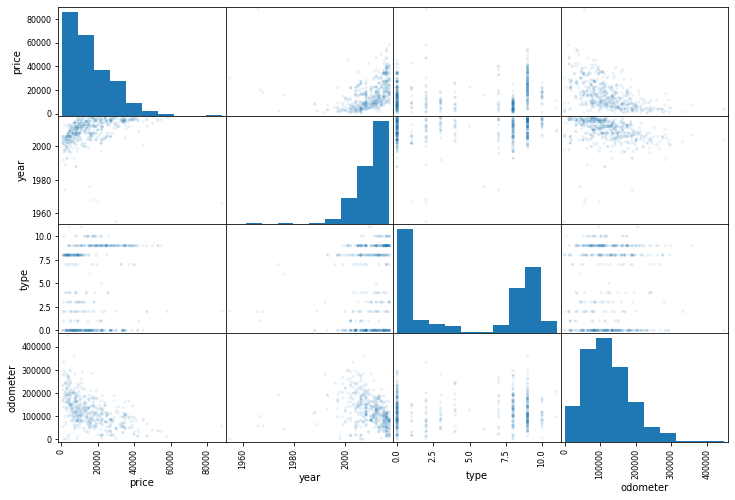

In [ ]:
num_attributes = ["price", "year", "type", "odometer"]
%matplotlib inline
pd.plotting.scatter_matrix(df[num_attributes], figsize = (12,8), alpha = 0.1)

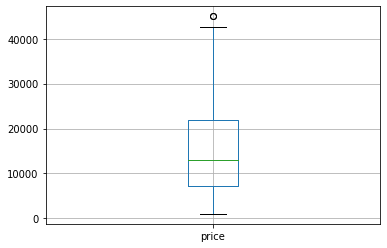

In [ ]:
# Removing Outliers
# Creating boxplot from matplotlib 

#The IQR, also called the midspread, is a measure of statistical dispersion and can be used to get identify and remove outliers. The theory of the IQR range rule is as follows:
#Calculate IQR (= 3rd quartile — 1st quartile)
#Find the minimum number of the range (=1st quartile — 1.5 * IQR)
#Find the maximum number of the range (=3rd quartile + 1.5 * IQR)
#Remove any values that lie outside of this range.

import matplotlib.pyplot as plt
%matplotlib inline

df = df[df['price'].between(999.99, 250000)] # Computing IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
df = df.query('(@Q1 - 1.5 * @IQR) <= price <= (@Q3 + 1.5 * @IQR)')
df.boxplot('price')

In [ ]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))


,Unnamed: 0,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,posting_date
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,1392.693359,7234627771.373047,1.576172,15434.900391,2009.521484,12.300781,169.886719,1.437500,3.841797,1.841797,122089.515625,0.142578,0.087891,1.001953,1.166016,4.613281,6.443359,34.088029,-85.242440,260.671875
std,854.846829,4153804.536573,1.159517,10454.962788,6.961983,7.919319,92.877351,1.027984,1.165540,0.559888,64404.682462,0.708616,0.345632,0.831143,0.554096,4.116558,3.927015,2.207836,3.511622,150.561980
min,3.000000,7224868654.000000,0.000000,1000.000000,1955.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.069889,-100.542731,0.000000
25%,607.500000,7231869441.250000,1.000000,7200.000000,2006.000000,8.000000,94.750000,0.000000,4.000000,2.000000,78418.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,33.243049,-86.817377,131.750000
50%,1270.000000,7235463319.500000,1.000000,12985.000000,2011.000000,10.000000,172.000000,2.000000,4.000000,2.000000,113243.000000,0.000000,0.000000,1.000000,1.000000,4.500000,8.000000,33.836393,-86.545000,260.500000
75%,2204.250000,7237421993.500000,2.000000,21960.000000,2015.000000,16.000000,261.250000,2.000000,5.000000,2.000000,160243.750000,0.000000,0.000000,2.000000,1.000000,9.000000,10.000000,34.586557,-84.777856,390.250000
max,2998.000000,7240585748.000000,5.000000,45000.000000,2017.000000,29.000000,302.000000,5.000000,6.000000,3.000000,447435.000000,4.000000,2.000000,2.000000,3.000000,11.000000,11.000000,40.468826,-74.281734,523.000000


In [ ]:
# set the ranges for odometer to 0–271,341.5.
df = df[df['odometer'].between(0, 271431.5)]

In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'region', 'price', 'year', 'manufacturer', 'model',
       'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [ ]:
#Keeping only useful column

df_final = df.copy().drop(['id','region','model','paint_color'], axis =1)
df_final.columns

Index(['Unnamed: 0', 'price', 'year', 'manufacturer', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'lat', 'long', 'posting_date'],
      dtype='object')

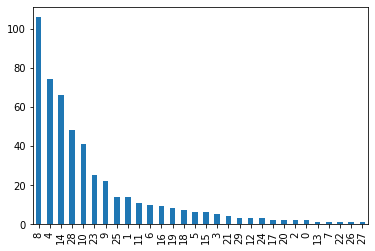

In [ ]:
#bar graph
df_final['manufacturer'].value_counts().plot(kind='bar')

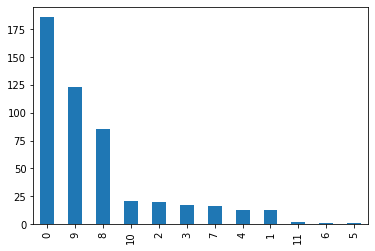

In [ ]:
df_final['type'].value_counts().plot(kind='bar')

In [ ]:
df_final.head()

,Unnamed: 0,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,lat,long,posting_date
3,3,2000,1974.0,4,2,2,2,190000.0,0,0,2,1,7,32.8616,-85.2161,474
4,4,19500,2005.0,8,0,5,0,116000.0,1,0,0,1,7,32.5475,-85.4682,465
14,14,4900,2003.0,8,2,5,2,177000.0,0,0,2,1,0,33.1512,-85.3722,382
47,47,6250,2010.0,8,2,4,2,82000.0,0,0,1,1,8,32.5475,-85.4682,114
65,65,27500,2015.0,14,3,4,2,84000.0,1,0,0,1,0,32.4715,-86.4831,51


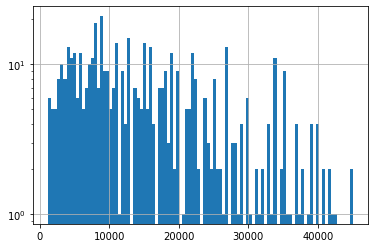

In [ ]:
#Histogram for price
df_final["price"].hist(bins = 100, log = True)

In [ ]:
X = df_final.drop('price',axis=1)

y = df_final.price

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.metrics import mean_squared_error

cars_predictions = linreg.predict(X)
lin_mse = mean_squared_error(y, cars_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

6500.824815250056

In [ ]:
cars_predictions[0:4]

array([-12147.71116904,  25465.51775451,   8560.01908382,  18932.58963711])

In [ ]:
list(y[0:4])

[2000, 19500, 4900, 6250]